In [1]:
import sys
import os
from os.path import abspath, join as path_join
import numpy as np
import ConfigSpace as CS
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
PARENT_DIR =  path_join(os.getcwd(), "..")
sys.path.insert(0, PARENT_DIR)
from autoda.data_augmentation import ImageAugmentation
from fanova import fANOVA
from fanova import visualizer



sns.set_style(style='whitegrid')


plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rc('font', size=15.0, family='serif')
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


Using TensorFlow backend.


In [2]:
results_path = path_join(abspath("."), "..", "experiments/results")

datasets = ["mnist"]

results = dict()


r = dict()
for d in datasets:
    p = dict()
    validation_accuracy = []
    validation_loss = []
    runtime = []
    config_ids = []
    configs=[]
    params = []
    pad = []
    rescale = []
    horizontal_flip = []
    vertical_flip = []
    rotation = []
    
    path = path_join(abspath("."), "..", "experiments/results")
    #n_runs = len([name for name in os.listdir(path_join(path, "mnist"))])
    n_runs = 1000
    for i in range(1, n_runs):
        try:
            from os.path import abspath, join as path_join
            config_path = "%s/config_%d.json" % (d, i)
            filename = path_join(path, config_path)
            with open(filename, "r") as f:
                res = json.load(f)
        except FileNotFoundError:
            print(i, d)
            continue

        runtime.append(res['runtime'])
        configs.append(res['configs'])

        config_ids.append(res["config_id"])
        validation_accuracy.append(res["validation_accuracy"])
        pad.append(res["configs"]["pad"])
        rescale.append(res['configs']['rescale'])
        horizontal_flip.append(res['configs']['horizontal_flip'])
        vertical_flip.append(res['configs']['vertical_flip'])
        rotation.append(res['configs']['rotation_range'])


    p['validation_accuracy'] = np.array(validation_accuracy)
    p["runtime"] = np.array(runtime)
    #p["params"] = params
    p['configs'] = configs
    p['config_ids'] = config_ids
    p['pad'] = pad
    p['rescale'] = rescale
    p["horizontal_flip"] = horizontal_flip
    p['vertical_flip'] = vertical_flip
    p['rotation'] = rotation
    results[d] = p
    


PDF plots of validation accuracy results on augmented MNIST image data

In [ ]:
dataset = "mnist"
validation_accuracy = results[dataset]["validation_accuracy"]
top10 = np.sort(validation_accuracy)[-100:]
sns.distplot(validation_accuracy, label='Results', norm_hist=True,  color="blue")
sns.distplot(top10, label='Top10', norm_hist=True, color="green")
plt.legend()
plt.ylabel("Configs")
plt.xlabel("Validation Accuracy", fontsize=15)
plt.title(dataset, fontsize=25)

CDF Plots

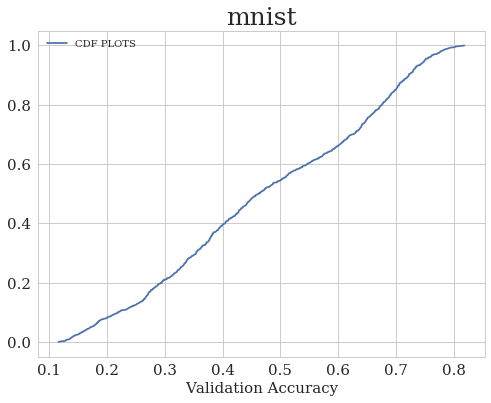

In [21]:
sorted_accuracy = np.sort(validation_accuracy)
yvals = np.arange(len(sorted_accuracy)) / float(len(sorted_accuracy))
plt.plot(sorted_accuracy, yvals, label= "CDF PLOTS")
plt.legend(loc=2, fontsize=10)
plt.xlabel("Validation Accuracy", fontsize=15)
plt.title(dataset, fontsize=25)


Plots with parameters, for example with padding and validation accuracy

999 999


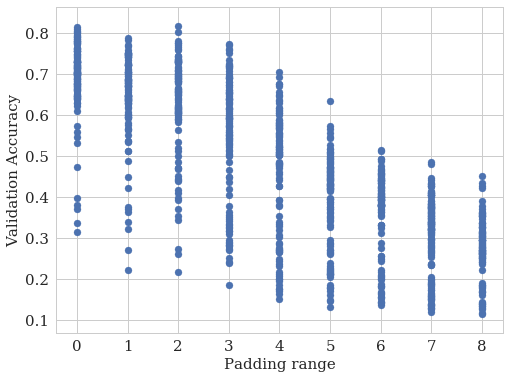

In [44]:
plt.scatter(x=pad, y=validation_accuracy)
ax = sns.boxplot(x="day", y="total_bill", data=tips)

plt.xlabel("Padding range", size=15)
plt.ylabel("Validation Accuracy", size=15)


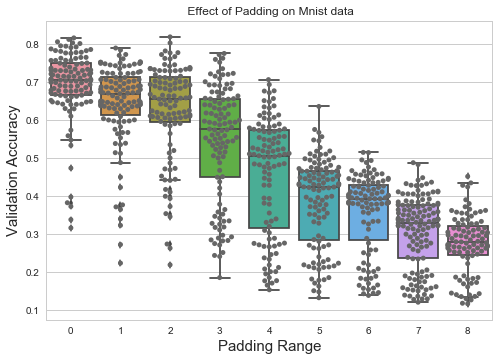

In [34]:
validation_accuracy = results[dataset]["validation_accuracy"]
padding = results[dataset]["pad"]

ax = sns.boxplot(x=padding, y=validation_accuracy)
ax = sns.swarmplot(x=padding, y=validation_accuracy, color=".40")
ax.set_title(' Effect of Padding on Mnist data')
ax.set_xlabel('Padding Range', size=15)
ax.set_ylabel('Validation Accuracy', size=15)

Effect of Rescale on Mnist data

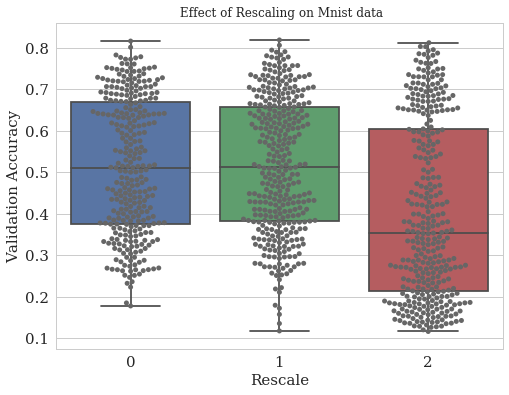

In [15]:

validation_accuracy = results[dataset]["validation_accuracy"]
rescale= results[dataset]["rescale"]
ax = sns.boxplot(x=rescale, y=validation_accuracy)
ax = sns.swarmplot(x=rescale, y=validation_accuracy, color=".40")
ax.set_title(' Effect of Rescaling on Mnist data')
plt.xlabel("Rescale", size=15)
plt.ylabel("Validation Accuracy", size=15)

Plot to show effect of Horizontal Flip on Mnist Data

999


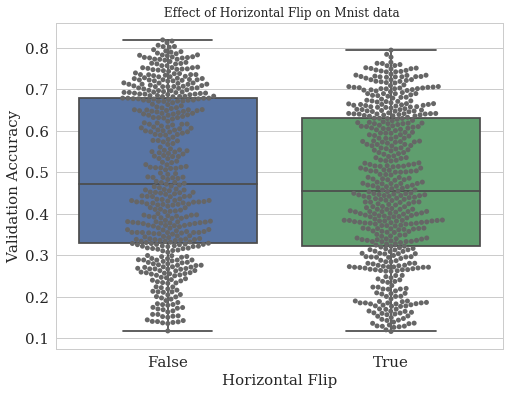

In [14]:
dataset = "mnist"
validation_accuracy = results[dataset]["validation_accuracy"]
hor_flip= results[dataset]["horizontal_flip"]
print(len(hor_flip))
ax = sns.boxplot(x=hor_flip, y=validation_accuracy)
ax = sns.swarmplot(x=hor_flip, y=validation_accuracy, color=".40")
ax.set_title(' Effect of Horizontal Flip on Mnist data')
plt.xlabel("Horizontal Flip", size=15)
plt.ylabel("Validation Accuracy", size=15)

Effect of Rotation Range on Mnist Data

[119, 81, 94, 3, 177, 78, 78, 101, 79, 70, 71, 134, 94, 60, 157, 167, 51, 55, 175, 127, 148, 109, 52, 97, 74, 148, 31, 72, 172, 153, 176, 7, 69, 36, 157, 135, 126, 141, 29, 32, 66, 175, 86, 170, 101, 103, 4, 51, 114, 76, 10, 70, 23, 119, 129, 68, 142, 46, 67, 79, 31, 18, 38, 94, 46, 112, 123, 54, 30, 110, 7, 112, 161, 110, 116, 18, 118, 58, 84, 92, 133, 23, 28, 106, 91, 153, 140, 75, 63, 177, 61, 95, 43, 144, 167, 108, 98, 29, 119, 129, 173, 177, 129, 114, 89, 71, 42, 73, 98, 148, 176, 149, 136, 88, 167, 79, 129, 173, 25, 17, 165, 129, 170, 150, 21, 127, 31, 136, 3, 27, 82, 55, 74, 66, 143, 157, 162, 158, 177, 136, 97, 20, 114, 100, 90, 98, 118, 6, 177, 131, 39, 8, 76, 14, 92, 166, 56, 85, 152, 39, 17, 46, 178, 71, 26, 92, 171, 92, 138, 130, 145, 20, 49, 88, 107, 162, 11, 83, 19, 173, 122, 159, 20, 9, 16, 148, 1, 53, 24, 32, 6, 159, 34, 60, 129, 30, 73, 174, 105, 0, 120, 177, 158, 81, 77, 63, 164, 45, 166, 139, 83, 148, 104, 156, 138, 94, 32, 86, 160, 57, 116, 35, 3, 73, 33, 97, 113, 3

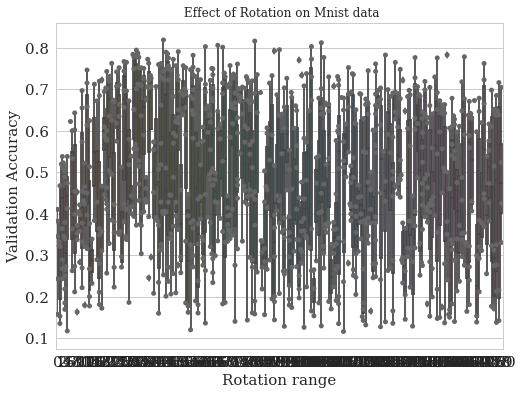

In [33]:
dataset = "mnist"
validation_accuracy = results[dataset]["validation_accuracy"]
rotation= results[dataset]["rotation"]
print(rotation)
ax = sns.boxplot(x=rotation, y=validation_accuracy)
ax = sns.swarmplot(x=rotation, y=validation_accuracy, color=".40")
ax.set_title(' Effect of Rotation on Mnist data')
plt.xlabel("Rotation range", size=15)
plt.ylabel("Validation Accuracy", size=15)

Make FANOVA Plots

In [9]:
dataset = "mnist"

order = ['rescale', 'vertical_flip', 'horizontal_flip', 'rotation_range', 'pad']
config_space = ImageAugmentation.get_config_space()


X = []

for c in results[dataset]["configs"]:
    vec = []
    for j, k in enumerate(order):
        if c[k] is not None: 
            vec.append(c[k])
        else:
            vec.append(0)
    X.append(vec)
X = np.array(X)
y = results[dataset]["validation_accuracy"]


vis = visualizer.Visualizer(f, f.cs)



rescale


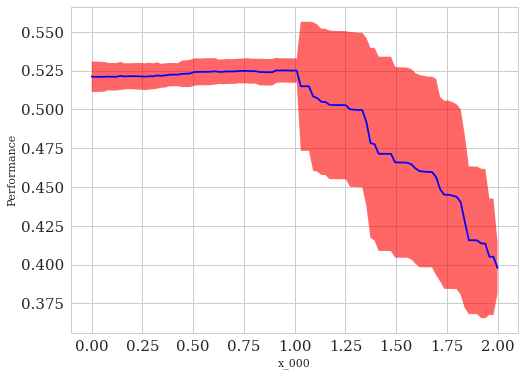

vertical_flip


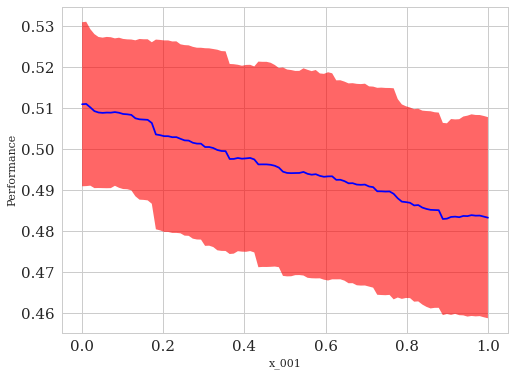

horizontal_flip


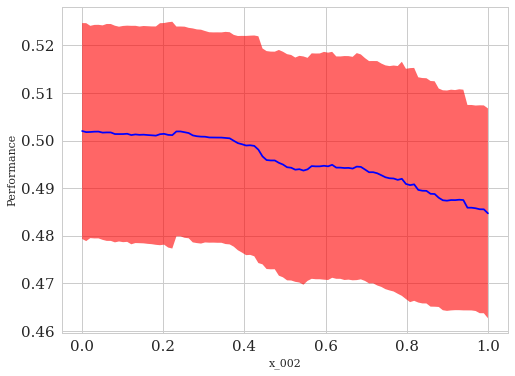

rotation_range


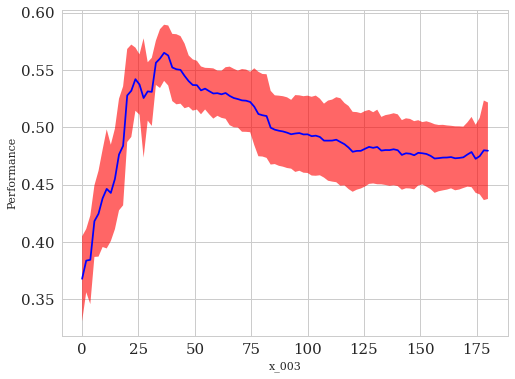

pad


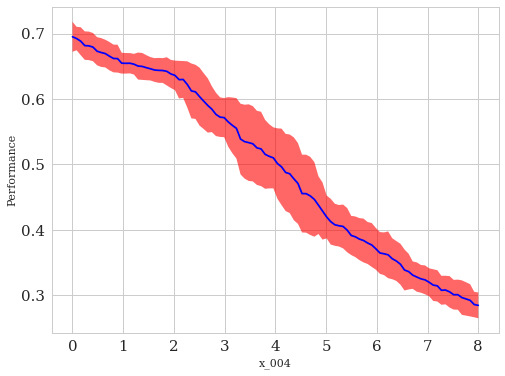

In [8]:
f = fANOVA(X, y)
vis = visualizer.Visualizer(f, f.cs)
for i in range(len(order)):
    print(order[i])
    vis.plot_marginal(i)
